# Problem Statement 1

In [1]:
# Load the dataset, check its shape

import pandas as pd 

df = pd.read_csv('Consumo_cerveja.csv')

df.shape


(941, 7)

In [2]:
#df.columns = ["Date", "Medium Temperature", "Minimum Temperature","Maximum Temperature", "Precipitacao", "End of Week", "Beer Consumption"]

In [3]:
# Rectify the data of the first four columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941 entries, 0 to 940
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Data                         365 non-null    object 
 1   Temperatura Media (C)        365 non-null    object 
 2   Temperatura Minima (C)       365 non-null    object 
 3   Temperatura Maxima (C)       365 non-null    object 
 4   Precipitacao (mm)            365 non-null    object 
 5   Final de Semana              365 non-null    float64
 6   Consumo de cerveja (litros)  365 non-null    float64
dtypes: float64(2), object(5)
memory usage: 51.6+ KB


In [4]:
# converting the data types of Temperatura Media (C), Temperatura Minima (C), Temperatura Maxima (C)  and Precipitacao (mm)  to  floats

cols_to_convert = [
    'Temperatura Media (C)', 'Temperatura Minima (C)', 
    'Temperatura Maxima (C)', 'Precipitacao (mm)'
]

for col in cols_to_convert:
    df[col] = df[col].str.replace(',', '.').apply(pd.to_numeric)

print(df.dtypes)

Data                            object
Temperatura Media (C)          float64
Temperatura Minima (C)         float64
Temperatura Maxima (C)         float64
Precipitacao (mm)              float64
Final de Semana                float64
Consumo de cerveja (litros)    float64
dtype: object


In [5]:
#Create new features using the 'Data' feature and the make 'Data' column as indexHint:Create a new feature 'Month' from the dates, consisting of the month of the year.Create a new feature 'Day' from the dates, consisting of the day of the week.Set values from the 'Data' column as indexes. Use code snippet:df1.set_index('Data',inplace=True)

# Convert the 'date_str' column to datetime
df['Data'] = pd.to_datetime(df['Data'])

# df.set_index('Data',inplace=True)

# Extract the desired components
df['Day'] = df['Data'].dt.day
df['Month'] = df['Data'].dt.month

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941 entries, 0 to 940
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Data                         365 non-null    datetime64[ns]
 1   Temperatura Media (C)        365 non-null    float64       
 2   Temperatura Minima (C)       365 non-null    float64       
 3   Temperatura Maxima (C)       365 non-null    float64       
 4   Precipitacao (mm)            365 non-null    float64       
 5   Final de Semana              365 non-null    float64       
 6   Consumo de cerveja (litros)  365 non-null    float64       
 7   Day                          365 non-null    float64       
 8   Month                        365 non-null    float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 66.3 KB


In [6]:
df.set_index('Data',inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 941 entries, 2015-01-01 to NaT
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Temperatura Media (C)        365 non-null    float64
 1   Temperatura Minima (C)       365 non-null    float64
 2   Temperatura Maxima (C)       365 non-null    float64
 3   Precipitacao (mm)            365 non-null    float64
 4   Final de Semana              365 non-null    float64
 5   Consumo de cerveja (litros)  365 non-null    float64
 6   Day                          365 non-null    float64
 7   Month                        365 non-null    float64
dtypes: float64(8)
memory usage: 66.2 KB


In [7]:
# Handle null and duplicate values 

# checking missing values and handelling missing values


df.isnull().sum() / df.sum() * 100

Temperatura Media (C)            7.434541
Temperatura Minima (C)           9.037562
Temperatura Maxima (C)           5.930075
Precipitacao (mm)               30.366934
Final de Semana                553.846154
Consumo de cerveja (litros)      6.212588
Day                             10.038341
Month                           24.181360
dtype: float64

In [8]:
import numpy as np

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(df)
imputed_data = imputer.transform(df.values)
df = pd.DataFrame(imputed_data, columns=df.columns, index=df.index)

c:\Users\mase-\anaconda3\envs\MachineLearning\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


In [9]:
df

,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros),Day,Month
Data,,,,,,,,
2015-01-01,27.300000,23.90000,32.500000,0.000000,0.000000,25.461000,1.000000,1.000000
2015-01-02,27.020000,24.50000,33.500000,0.000000,0.000000,28.972000,2.000000,1.000000
2015-01-03,24.820000,22.40000,29.900000,0.000000,1.000000,30.814000,3.000000,1.000000
2015-01-04,23.980000,21.50000,28.600000,1.200000,1.000000,29.799000,4.000000,1.000000
2015-01-05,23.820000,21.00000,28.300000,0.000000,0.000000,28.900000,5.000000,1.000000
...,...,...,...,...,...,...,...,...
NaT,21.226356,17.46137,26.611507,5.196712,0.284932,25.401367,15.720548,6.526027
NaT,21.226356,17.46137,26.611507,5.196712,0.284932,25.401367,15.720548,6.526027
NaT,21.226356,17.46137,26.611507,5.196712,0.284932,25.401367,15.720548,6.526027


In [10]:
df[df.duplicated(keep=False)]


,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros),Day,Month
Data,,,,,,,,
NaT,21.226356,17.46137,26.611507,5.196712,0.284932,25.401367,15.720548,6.526027
NaT,21.226356,17.46137,26.611507,5.196712,0.284932,25.401367,15.720548,6.526027
NaT,21.226356,17.46137,26.611507,5.196712,0.284932,25.401367,15.720548,6.526027
NaT,21.226356,17.46137,26.611507,5.196712,0.284932,25.401367,15.720548,6.526027
NaT,21.226356,17.46137,26.611507,5.196712,0.284932,25.401367,15.720548,6.526027
...,...,...,...,...,...,...,...,...
NaT,21.226356,17.46137,26.611507,5.196712,0.284932,25.401367,15.720548,6.526027
NaT,21.226356,17.46137,26.611507,5.196712,0.284932,25.401367,15.720548,6.526027
NaT,21.226356,17.46137,26.611507,5.196712,0.284932,25.401367,15.720548,6.526027


In [11]:
# Removing duplicates

df.drop_duplicates(inplace=True, keep= False)


In [12]:
# Check the data typeof the features and convert them to the appropriate data type

df.dtypes

Temperatura Media (C)          float64
Temperatura Minima (C)         float64
Temperatura Maxima (C)         float64
Precipitacao (mm)              float64
Final de Semana                float64
Consumo de cerveja (litros)    float64
Day                            float64
Month                          float64
dtype: object

In [13]:

cols_to_convert = [
    'Day', 'Month', 'Final de Semana'
]

for col in cols_to_convert:
    df[col] = df[col].astype('category')

print(df.dtypes)

Temperatura Media (C)           float64
Temperatura Minima (C)          float64
Temperatura Maxima (C)          float64
Precipitacao (mm)               float64
Final de Semana                category
Consumo de cerveja (litros)     float64
Day                            category
Month                          category
dtype: object


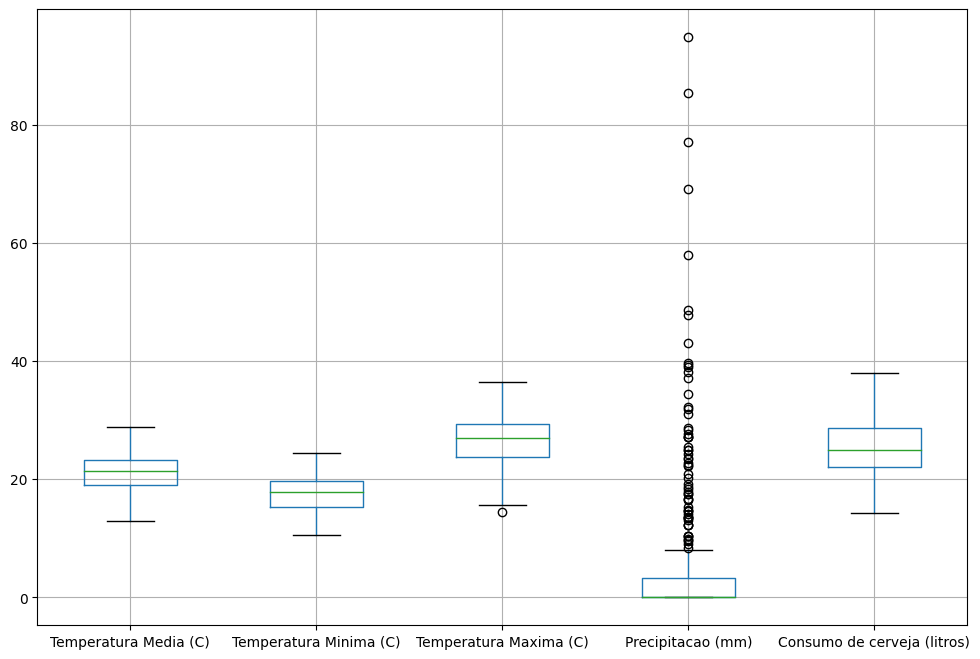

In [14]:
# Analysing feautures with outliers

import matplotlib.pyplot as plt
import seaborn as sns



cols_to_analyse = [
    'Temperatura Media (C)', 'Temperatura Minima (C)', 
    'Temperatura Maxima (C)', 'Precipitacao (mm)' , 'Consumo de cerveja (litros)'
]

df.boxplot(figsize=(12,8))
plt.show()

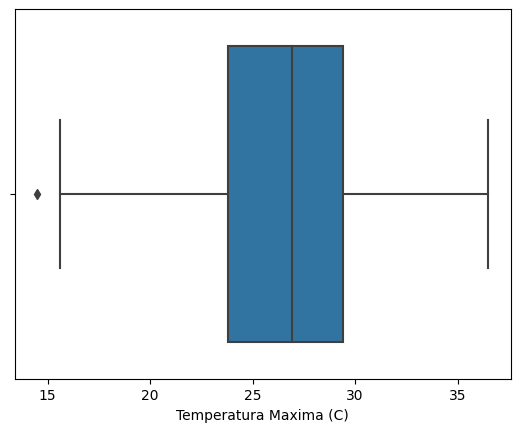

In [15]:
# columns identified with outliers  visual presentation by means of box plot and histrogram

sns.boxplot(data=df, x='Temperatura Maxima (C)')
plt.show()

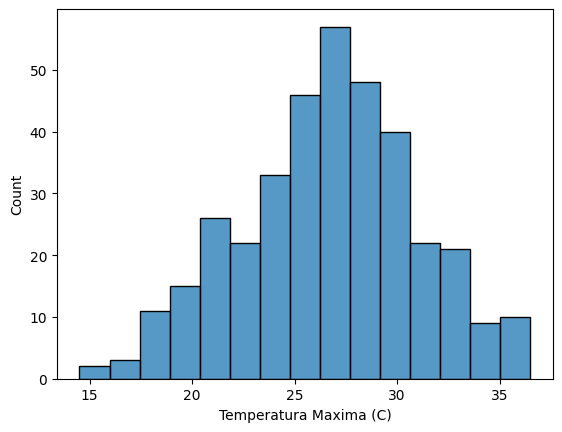

In [16]:
sns.histplot(data=df, x='Temperatura Maxima (C)')
plt.show()

The Temperatura Maxima is slightly skewed to the left. This is because of one outlier very small value visible on the boxplot.

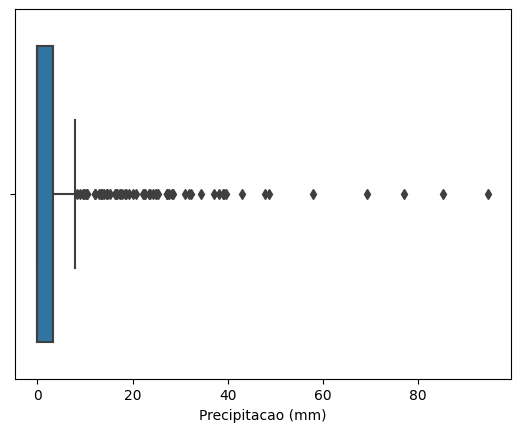

In [17]:
# Analysing feautures with outliers

sns.boxplot(data=df, x='Precipitacao (mm)')
plt.show()

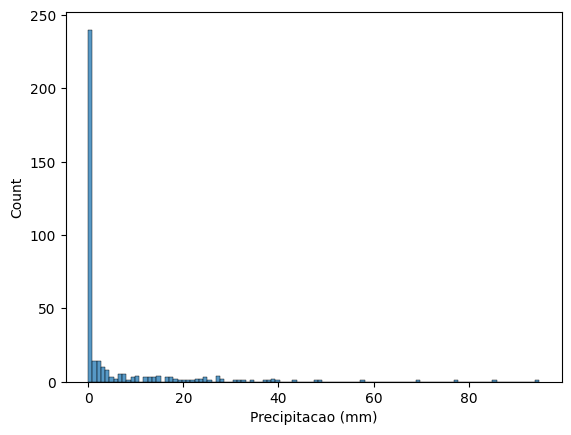

In [18]:
sns.histplot(data=df, x='Precipitacao (mm)')
plt.show()

The Temperatura Maxima is extremely skewed to the right. This is because of few extreme large values presents in the dataset. This is clearly visible on the boxplot and histrogram


In [19]:
# Plot and analyze the correlation
df.corr(numeric_only = True).round(2)

,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Consumo de cerveja (litros)
Temperatura Media (C),1.00,0.86,0.92,0.02,0.57
Temperatura Minima (C),0.86,1.00,0.67,0.10,0.39
Temperatura Maxima (C),0.92,0.67,1.00,-0.05,0.64
Precipitacao (mm),0.02,0.10,-0.05,1.00,-0.19
Consumo de cerveja (litros),0.57,0.39,0.64,-0.19,1.00


C:\Users\mase-\AppData\Local\Temp\ipykernel_154276\1269292415.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='coolwarm',annot=True)


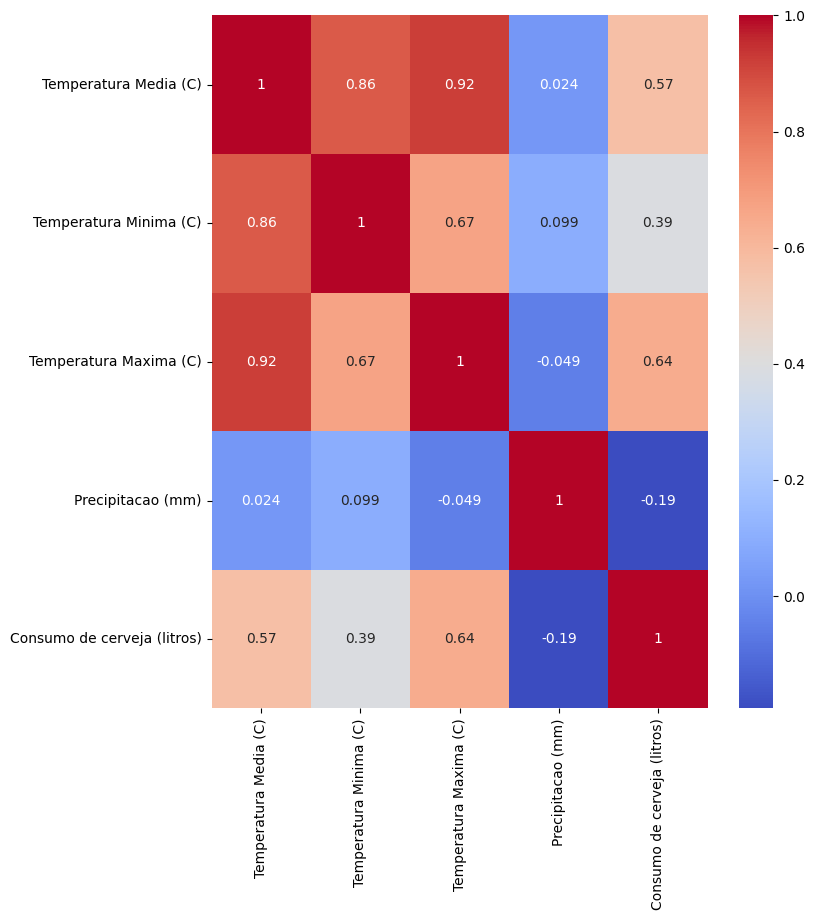

In [20]:
plt.figure(figsize=(8,9))
sns.heatmap(df.corr(), cmap='coolwarm',annot=True)
plt.show()

Temperatura Media (C) 0.57: This suggests a moderately strong positive linear relationship. As Temperatura Media (C) variable increases, Consumo de cerveja tends to increase as well.

Temperatura Minima (C) 0.39: This indicates a moderate positive linear relationship. It's weaker than 0.57, but there's still some positive association between Temperatura Minima and Consumo de cerveja .

Temperatura Maxima (C) 0.64: This number suggests a strong positive linear relationship. As Temperatura Maxima increases, Consumo de cerveja  is likely to increase too.

Precipitacao (mm) -0.19: This indicates a weak negative linear relationship. It's a weak association, but when Precipitacao  increases, Consumo de cerveja  tends to decrease slightly.



In [21]:
from sklearn.model_selection import train_test_split

#Restructuring the Dataframe 
y=df['Consumo de cerveja (litros)']
x=df.drop(columns='Consumo de cerveja (litros)', axis = 1)

x

,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Day,Month
Data,,,,,,,
2015-01-01,27.30,23.9,32.5,0.0,0.0,1.0,1.0
2015-01-02,27.02,24.5,33.5,0.0,0.0,2.0,1.0
2015-01-03,24.82,22.4,29.9,0.0,1.0,3.0,1.0
2015-01-04,23.98,21.5,28.6,1.2,1.0,4.0,1.0
2015-01-05,23.82,21.0,28.3,0.0,0.0,5.0,1.0
...,...,...,...,...,...,...,...
2015-12-27,24.00,21.1,28.2,13.6,1.0,27.0,12.0
2015-12-28,22.64,21.1,26.7,0.0,0.0,28.0,12.0
2015-12-29,21.68,20.3,24.1,10.3,0.0,29.0,12.0


In [22]:

# Splitting the data-set into training and testing into 80%-20%

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

print('Trained data-set:',X_train.shape)
#test data-set is observed to be 20% of data
print('Test data-set:',X_test.shape)

Trained data-set: (292, 7)
Test data-set: (73, 7)


In [23]:
# Train a linear regression model and print the intercept and coefficients 

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

linreg = LinearRegression()
linreg.fit(X_train, y_train)

print(linreg.coef_)
print(linreg.intercept_)

[ 0.06391442 -0.04755926  0.63228535 -0.05492227  5.03264929  0.00591103
  0.12254934]
6.034137778210095


In [24]:
# Let's create a new data frame with the names of the features
reg_summary = pd.DataFrame(data = X_train.columns, columns=['Features'])
reg_summary ['Coefficients'] = np.round(linreg.coef_,4)
reg_summary.loc[8]= ['Intercept', np.round(linreg.intercept_)]
reg_summary

,Features,Coefficients
0,Temperatura Media (C),0.0639
1,Temperatura Minima (C),-0.0476
2,Temperatura Maxima (C),0.6323
3,Precipitacao (mm),-0.0549
4,Final de Semana,5.0326
5,Day,0.0059
6,Month,0.1225
8,Intercept,6.0000


In [25]:
# Evaluate the model using the R2 score, mean absolute error, and root mean squared error

# R squared

linreg.score(X_train,y_train)

print('Training data R-squared:', np.round(linreg.score(X_train, y_train),3))
print('Test data R-squared:', np.round(linreg.score(X_test, y_test),3))

Training data R-squared: 0.705
Test data R-squared: 0.805


In [26]:
#  mean absolute error, and 

from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_test, linreg.predict(X_test)))

1.809257306083641


In [27]:
# root mean squared error


MSE_test = mean_absolute_error(y_test, linreg.predict(X_test))

RMSE_test = np.sqrt(MSE_test)
np.round(RMSE_test,3)

1.345

# Problem Statement 2: 

You are provided with the California housing dataset. Based on the given 
parameters of a house, predict its price.

Dataset Description

The dataset contains nine features:
I. longitude: A measure of how far west a house is; a higher value is farther west
II. latitude: A measure of how far north a house is; a higher value is farther north
III. housingMedianAge: Median age of a house within a block; a lower number is a newer 
building
IV. total rooms: Total number of rooms within a block
V. total bedrooms: Total number of bedrooms within a block
VI. population: Total number of people residing within a block
VII. households: Total number of households, a group of people residing within a home unit, 
for a block
VIII. median income: Median income for households within a block of houses (measured in 
tens of thousands of US Dollars)
IX. median house value: Median house value for households within a block (measured in US 
Dollars)

In [28]:
# 1. Load the data, check its shape, and check for null values
data = pd.read_csv('california_housing_train.csv')

print(f"Data Shape: {data.shape}")


Data Shape: (17000, 9)


In [29]:
print(f"Null Values:\n{data.isnull().sum()}")

Null Values:
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64


In [30]:
 # 2. Split the dataset for training and testing

X = data.drop('median_house_value', axis=1)
y = data['median_house_value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1000, random_state=42)

print('Trained data-set:',X_train.shape)
#test data-set is observed to be 20% of data
print('Test data-set:',X_test.shape)


Trained data-set: (16000, 8)
Test data-set: (1000, 8)


In [31]:
# 3. Train the model using sklearn
regressor = LinearRegression()
regressor.fit(X_train, y_train)



LinearRegression()

In [32]:
# 4. Predict the prices on test data and evaluate the model
y_pred = regressor.predict(X_test)
print(f"R2 Score: {r2_score(y_test, y_pred)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")



R2 Score: 0.6427633944326594
Mean Absolute Error: 52486.711217710996


In [33]:
# 5. Find coefficient and intercept using the trained model
print(f"Coefficients: {regressor.coef_}")
print(f"Intercept: {regressor.intercept_}")

reg_summary_1 = pd.DataFrame(data = X_train.columns, columns=['Features'])
reg_summary_1 ['Coefficients'] = np.round(regressor.coef_,4)
reg_summary_1.loc[8]= ['Intercept', np.round(regressor.intercept_)]
reg_summary_1

Coefficients: [-4.32650586e+04 -4.29877050e+04  1.13224456e+03 -8.24971921e+00
  1.15173391e+02 -3.72835206e+01  4.39458716e+01  4.04437504e+04]
Intercept: -3632877.8425116707


,Features,Coefficients
0,longitude,-4.326506e+04
1,latitude,-4.298771e+04
2,housing_median_age,1.132245e+03
3,total_rooms,-8.249700e+00
4,total_bedrooms,1.151734e+02
5,population,-3.728350e+01
6,households,4.394590e+01
7,median_income,4.044375e+04
8,Intercept,-3.632878e+06


# Problem Statement 3:

You are provided with the medical cost dataset. You need to predict individual medical costs billed by health insurance.

Dataset Description:I.
age: age of the primary beneficiaryII.
sex: gender of primary beneficiary female,
maleIII.bmi: Body mass index, providing an understanding of the body, weights that are relatively high or low relative to height, an objective index of bodyIV.
weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9V.
children: Number of children covered by health insurance / Number of dependentsVI.
smoker: Smokes or notVII.
region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwestVIII.
charges: Individual medical costs billed by health insurance.

In [34]:
# 1. Load the data, check its shape, and check for null values

medical_cost_dataset= pd.read_csv('insurance.csv')
print(f"Data Shape: {medical_cost_dataset.shape}")
print(f"Null Values:\n{medical_cost_dataset.isnull().sum()}")

Data Shape: (1338, 7)
Null Values:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [35]:

# 2. Convert categorical features to numerical values using One-Hot Encoding
medical_cost_dataset= pd.get_dummies(medical_cost_dataset, drop_first=True)  # drop_first prevents multicollinearity

# 3. Split the dataset for training and testing
# Assuming the target column is 'prices'
X = medical_cost_dataset.drop('charges', axis=1)
y = medical_cost_dataset['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [36]:
# 4. Train the model using sklearn – Linear Regression
Regressor = LinearRegression()
Regressor.fit(X_train, y_train)

LinearRegression()

In [37]:
# 5. Find the intercept and coefficient from the trained model
print(f"Intercept: {Regressor.intercept_}")
print(f"Coefficients: {Regressor.coef_}")


reg_summary_2 = pd.DataFrame(data = X.columns, columns=['Features'])
reg_summary_2 ['Coefficients'] = np.round(Regressor.coef_,4)
reg_summary_2.loc[8]= ['Intercept', np.round(Regressor.intercept_)]
reg_summary_2

Intercept: -11931.219050326688
Coefficients: [ 2.56975706e+02  3.37092552e+02  4.25278784e+02 -1.85916916e+01
  2.36511289e+04 -3.70677326e+02 -6.57864297e+02 -8.09799354e+02]


,Features,Coefficients
0,age,256.9757
1,bmi,337.0926
2,children,425.2788
3,sex_male,-18.5917
4,smoker_yes,23651.1289
5,region_northwest,-370.6773
6,region_southeast,-657.8643
7,region_southwest,-809.7994
8,Intercept,-11931.0000


In [38]:
# 6. Predict the prices of test data
y_pred = Regressor.predict(X_test)

df_predictions = pd.DataFrame({'actuals':y_test, 'predictions':y_pred, 'resid': y_test - y_pred})
df_predictions.head()


,actuals,predictions,resid
764,9095.06825,8969.550274,125.517976
887,5272.17580,7068.747443,-1796.571643
890,29330.98315,36858.410912,-7527.427762
1293,9301.89355,9454.678501,-152.784951
259,33750.29180,26973.173457,6777.118343


In [39]:
# Evaluate the model using calculated r2 score and root mean squared error

print(f"R2 Score: {r2_score(y_test, y_pred)}")


R2 Score: 0.7835929767120724


In [40]:
# root mean squared error

from sklearn.metrics import mean_squared_error

print(f"Linear Regression Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_pred))}")


Linear Regression Root Mean Squared Error: 5796.284659276273


# Problem Statement 4




In [41]:

# 1. Load the data, check its shape and check for null values
data = pd.read_csv('50_Startups.csv')
print(f"Data Shape: {data.shape}")
print(f"Null Values:\n{data.isnull().sum()}")

Data Shape: (50, 5)
Null Values:
R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64


In [42]:
# 2. Convert categorical features to numerical values using Label Encoder


from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['State'] = label_encoder.fit_transform(data['State'])


In [43]:
# 3. Split the dataset for training and testing
X = data.drop('Profit', axis=1)
y = data['Profit']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
# 4. Train the model using sklearn Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

In [45]:
# Get the intercept and coefficient
print(f"Intercept: {lr.intercept_}")
print(f"Coefficients: {lr.coef_}")


Intercept: 54080.71684611381
Coefficients: [  0.80379465  -0.06791023   0.03126059 -16.82030683]


In [46]:
# Predict the profits of test data
y_pred = lr.predict(X_test)

In [47]:
# Evaluate the model

from sklearn.metrics import mean_squared_error


print(f"Linear Regression R2 Score: {r2_score(y_test, y_pred)}")
print(f"Linear Regression Mean Squared Error: {mean_squared_error(y_test, y_pred)}")


Linear Regression R2 Score: 0.9000614254946405
Linear Regression Mean Squared Error: 80929465.49097762


In [48]:

# 6. Regularize the model using Ridge Regression

from sklearn.linear_model import LinearRegression, Ridge, Lasso
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
print(f"Ridge Regression Score: {ridge.score(X_test, y_test)}")

Ridge Regression Score: 0.9000615874908106


In [49]:

# 7. Regularize the model using Lasso Regression
lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)
print(f"Lasso Regression Score: {lasso.score(X_test, y_test)}")

Lasso Regression Score: 0.9000618249851652
